In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', names=[
    'pregnant','plasma','pressure','thickness', 'insulin','BMI',"pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df[['pregnant','class']].head(10)

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
5,5,0
6,3,1
7,10,0
8,2,1
9,8,1


In [4]:
# 임신 횟수와 당뇨병 발병 확률
df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by = 'pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

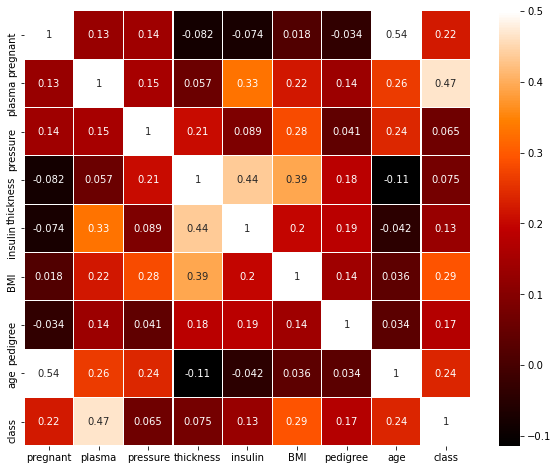

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

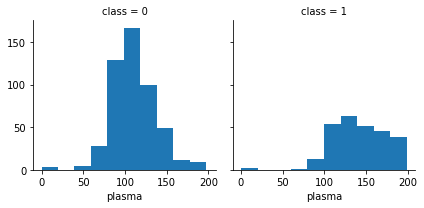

In [7]:
# 공복혈당(plasma)과 당뇨병과의 관계
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins =10)
plt.show()

## Logistic Regression by Deep Learning

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
# 데이터 로드
dataset = np.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter =",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify = Y, random_state=seed)

In [12]:
model = Sequential([
    Dense(24, input_shape=(8,), activation ='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs=200, batch_size=10)

Train on 491 samples, validate on 123 samples
Epoch 1/200
491/491 [==============================] - 0s 756us/sample - loss: 2.6072 - accuracy: 0.5866 - val_loss: 0.9058 - val_accuracy: 0.6829
Epoch 2/200
491/491 [==============================] - 0s 88us/sample - loss: 1.1263 - accuracy: 0.6436 - val_loss: 0.7823 - val_accuracy: 0.6911
Epoch 3/200
491/491 [==============================] - 0s 89us/sample - loss: 0.9609 - accuracy: 0.6558 - val_loss: 0.7451 - val_accuracy: 0.6829
Epoch 4/200
491/491 [==============================] - 0s 93us/sample - loss: 0.8887 - accuracy: 0.6436 - val_loss: 0.8085 - val_accuracy: 0.6829
Epoch 5/200
491/491 [==============================] - 0s 79us/sample - loss: 0.8276 - accuracy: 0.6538 - val_loss: 0.7058 - val_accuracy: 0.6829
Epoch 6/200
491/491 [==============================] - 0s 85us/sample - loss: 0.7693 - accuracy: 0.6660 - val_loss: 0.7015 - val_accuracy: 0.7154
Epoch 7/200
491/491 [==============================] - 0s 95us/sample - loss:

491/491 [==============================] - 0s 97us/sample - loss: 0.5473 - accuracy: 0.7291 - val_loss: 0.5692 - val_accuracy: 0.7317
Epoch 57/200
491/491 [==============================] - 0s 101us/sample - loss: 0.5394 - accuracy: 0.7291 - val_loss: 0.5844 - val_accuracy: 0.7073
Epoch 58/200
491/491 [==============================] - 0s 100us/sample - loss: 0.5296 - accuracy: 0.7373 - val_loss: 0.5712 - val_accuracy: 0.7236
Epoch 59/200
491/491 [==============================] - 0s 98us/sample - loss: 0.5428 - accuracy: 0.7495 - val_loss: 0.6283 - val_accuracy: 0.6423
Epoch 60/200
491/491 [==============================] - 0s 102us/sample - loss: 0.5353 - accuracy: 0.7454 - val_loss: 0.5875 - val_accuracy: 0.7073
Epoch 61/200
491/491 [==============================] - 0s 97us/sample - loss: 0.5409 - accuracy: 0.7373 - val_loss: 0.5864 - val_accuracy: 0.6992
Epoch 62/200
491/491 [==============================] - 0s 101us/sample - loss: 0.5599 - accuracy: 0.7434 - val_loss: 0.6162 - v

491/491 [==============================] - 0s 98us/sample - loss: 0.4957 - accuracy: 0.7658 - val_loss: 0.5701 - val_accuracy: 0.7398
Epoch 112/200
491/491 [==============================] - 0s 99us/sample - loss: 0.4914 - accuracy: 0.7617 - val_loss: 0.5378 - val_accuracy: 0.7480
Epoch 113/200
491/491 [==============================] - 0s 101us/sample - loss: 0.4911 - accuracy: 0.7699 - val_loss: 0.6033 - val_accuracy: 0.6748
Epoch 114/200
491/491 [==============================] - 0s 98us/sample - loss: 0.5161 - accuracy: 0.7434 - val_loss: 0.5530 - val_accuracy: 0.7073
Epoch 115/200
491/491 [==============================] - 0s 98us/sample - loss: 0.5190 - accuracy: 0.7556 - val_loss: 0.5788 - val_accuracy: 0.6748
Epoch 116/200
491/491 [==============================] - 0s 99us/sample - loss: 0.4953 - accuracy: 0.7597 - val_loss: 0.5711 - val_accuracy: 0.7236
Epoch 117/200
491/491 [==============================] - 0s 98us/sample - loss: 0.4935 - accuracy: 0.7617 - val_loss: 0.5555 

491/491 [==============================] - 0s 96us/sample - loss: 0.4907 - accuracy: 0.7536 - val_loss: 0.5816 - val_accuracy: 0.7642
Epoch 167/200
491/491 [==============================] - 0s 98us/sample - loss: 0.4925 - accuracy: 0.7739 - val_loss: 0.5606 - val_accuracy: 0.7398
Epoch 168/200
491/491 [==============================] - 0s 100us/sample - loss: 0.4806 - accuracy: 0.7739 - val_loss: 0.5767 - val_accuracy: 0.7642
Epoch 169/200
491/491 [==============================] - 0s 96us/sample - loss: 0.4824 - accuracy: 0.7760 - val_loss: 0.5622 - val_accuracy: 0.7154
Epoch 170/200
491/491 [==============================] - 0s 99us/sample - loss: 0.4825 - accuracy: 0.7678 - val_loss: 0.6285 - val_accuracy: 0.6829
Epoch 171/200
491/491 [==============================] - 0s 99us/sample - loss: 0.4804 - accuracy: 0.7760 - val_loss: 0.5748 - val_accuracy: 0.7236
Epoch 172/200
491/491 [==============================] - 0s 99us/sample - loss: 0.4865 - accuracy: 0.7637 - val_loss: 0.5493 

In [15]:
print("\n Accuracy : %.4f" %(model.evaluate(X_test,Y_test, verbose=2))[1])

154/154 - 0s - loss: 0.5124 - accuracy: 0.7597

 Accuracy : 0.7597
